In [150]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium  # Importar la librería folium para mapas interactivos

In [3]:
print(os.getcwd())  # Muestra la ruta actual

C:\Users\57302\Documents\Analisis de datos\Proyecto_ integrador_sql_python\etl_proyecto_mundial


In [152]:
os.chdir("C:/Users/57302/Documents/Analisis de datos/Proyecto_ integrador_sql_python")
print("Nueva ruta:", os.getcwd())  # Verifica el cambio

Nueva ruta: C:\Users\57302\Documents\Analisis de datos\Proyecto_ integrador_sql_python


In [154]:
# Cargar los archivos CSV
df_city = pd.read_csv("etl_proyecto_mundial/datos_csv/city.csv")
df_country = pd.read_csv("etl_proyecto_mundial/datos_csv/country.csv")
df_countrylanguage = pd.read_csv("etl_proyecto_mundial/datos_csv/countrylanguage.csv")

#### 🔍 Exploración de City

In [9]:
df_city

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200
...,...,...,...,...,...
4074,4075,Khan Yunis,PSE,Khan Yunis,123175
4075,4076,Hebron,PSE,Hebron,119401
4076,4077,Jabaliya,PSE,North Gaza,113901
4077,4078,Nablus,PSE,Nablus,100231


In [11]:
print("📊 Información General de City\n")
df_city.info()

📊 Información General de City

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           4079 non-null   int64 
 1   Name         4079 non-null   object
 2   CountryCode  4079 non-null   object
 3   District     4075 non-null   object
 4   Population   4079 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 159.5+ KB


In [13]:
# Valores unicos de id 
len(df_city.ID.unique())

4079

Se observa que no hay valores repetidos del ID city, ya que la cantidad de valores únicos coincide con la cantidad total de datos.

In [164]:
# Valores nulos en cada DataFrame
def detectar_nulos(df, nombre):
    nulos = df.isnull().sum()
    porcentaje = (df.isnull().mean() * 100).round(2) # Convertir a porcentaje y redondear a 2 decimales
    df_nulos = pd.DataFrame({"Valores Nulos": nulos, "Porcentaje (%)": porcentaje})
    df_nulos = df_nulos[df_nulos["Valores Nulos"] > 0] # Filtrar solo las columnas que tienen valores nulos
    print(f"\n🔍 Valores nulos en {nombre}:")
    display(df_nulos)

In [20]:
detectar_nulos(df_city, "City")


🔍 Valores nulos en City:


,Valores Nulos,Porcentaje (%)
District,4,0.1


##### -📝 Manejo de Valores Nulos en el df City, columna `District`

In [23]:
# Filtrar filas con valores nulos en la columna District y mostrar el resto de la información
print("\n🔍 Filas con valores nulos en la columna 'District' en City:")
df_nulos_district = df_city[df_city["District"].isnull()]
df_nulos_district


🔍 Filas con valores nulos en la columna 'District' en City:


,ID,Name,CountryCode,District,Population
3284,3285,Taiping,TWN,NaN,165524
3292,3293,Taliao,TWN,NaN,115897
3293,3294,Kueishan,TWN,NaN,112195
3562,3563,Ciudad Losada,VEN,NaN,134501


Se realizó una **unión** con la tabla `country` para obtener más contexto sobre cada ciudad, incluyendo el **nombre del país**, la **región** y el **área de superficie**; con el fin de  analizar mejor la información y facilitar la búsqueda de los distritos correctos.

In [26]:
df_nulos_district = df_nulos_district.merge(
    df_country[["Code", "Name", "Region", "SurfaceArea"]].rename(columns={"Name": "NamePais"}), 
    left_on="CountryCode",  # Columna en df_nulos_district
    right_on="Code",        # Columna en df_country
    how="left"
)
df_nulos_district

,ID,Name,CountryCode,District,Population,Code,NamePais,Region,SurfaceArea
0,3285,Taiping,TWN,NaN,165524,TWN,Taiwan,Eastern Asia,36188.0
1,3293,Taliao,TWN,NaN,115897,TWN,Taiwan,Eastern Asia,36188.0
2,3294,Kueishan,TWN,NaN,112195,TWN,Taiwan,Eastern Asia,36188.0
3,3563,Ciudad Losada,VEN,NaN,134501,VEN,Venezuela,South America,912050.0


###### 🌍 Búsqueda de información externa
No obstante, debido a la ausencia de datos en la fuente original, consulté fuentes externas para determinar los distritos correspondientes a cada ciudad

###### ✅ Corrección y actualización de valores en VS Code  
Se asignaron manualmente los valores correctos a la columna `"District"` utilizando un diccionario de mapeo y la función `.map()`.

#### 🔍 Exploración de Country

In [31]:
df_country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [33]:
print("📊 Información General de Cpuntry\n")
df_country.info()

📊 Información General de Cpuntry

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    float64
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    float64
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     236 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           238 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 28.1+ KB


In [27]:
# Contar valores unicos de Code
len(df_country.Code.unique())

239

In [162]:
# Contar valores únicos en 'Name'
unique_names = df_country["Name"].nunique()
total_records = len(df_country)

print(f"Total de registros en country: {total_records}")
print(f"Nombres únicos en country: {unique_names}")

if unique_names < total_records:
    print("⚠️ Hay nombres duplicados en la tabla Country.")
    display(df_country[df_country.duplicated(subset=["Name"], keep=False)].sort_values("Name"))
else:
    print("✅ No hay nombres de países duplicados en la tabla Country.")

Total de registros en country: 239
Nombres únicos en country: 239
✅ No hay nombres de países duplicados en la tabla Country.


###### 📌 Validación de Valores Únicos en la Tabla `Country`

Para asegurar la integridad de los datos en la tabla `Country`, se realizó la validación de los valores únicos en las columnas `Code` y `Name`:

- **Código del país (`Code`)**: Se verificó que cada país tiene un código único, sin repeticiones.
- **Nombre del país (`Name`)**: También se comprobó que los nombres de los países no se repiten, garantizando que no haya registros duplicados.


In [37]:
detectar_nulos(df_country, "Country")


🔍 Valores nulos en Country:


,Valores Nulos,Porcentaje (%)
IndepYear,47,19.67
LifeExpectancy,17,7.11
GNPOld,61,25.52
HeadOfState,3,1.26
Capital,7,2.93
Code2,1,0.42


In [31]:
# Filtrar filas con valores nulos en la columna IndepYear 
print("\n🔍 Filas con valores nulos en la columna 'IndepYear' en Country:")
df_nulos_indepyear = df_country[df_country["IndepYear"].isnull()]
df_nulos_indepyear


🔍 Filas con valores nulos en la columna 'IndepYear' en Country:


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
6,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.0,NaN,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix,33.0,AN
10,ASM,American Samoa,Oceania,Polynesia,199.0,NaN,68000,75.1,334.0,NaN,Amerika Samoa,US Territory,George W. Bush,54.0,AS
11,ATA,Antarctica,Antarctica,Antarctica,13120000.0,NaN,0,NaN,0.0,NaN,–,Co-administrated,NaN,NaN,AQ
12,ATF,French Southern territories,Antarctica,Antarctica,7780.0,NaN,0,NaN,0.0,NaN,Terres australes françaises,Nonmetropolitan Territory of France,Jacques Chirac,NaN,TF
28,BMU,Bermuda,North America,North America,53.0,NaN,65000,76.9,2328.0,2190.0,Bermuda,Dependent Territory of the UK,Elisabeth II,191.0,BM
34,BVT,Bouvet Island,Antarctica,Antarctica,59.0,NaN,0,NaN,0.0,NaN,Bouvetøya,Dependent Territory of Norway,Harald V,NaN,BV
38,CCK,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,14.0,NaN,600,NaN,0.0,NaN,Cocos (Keeling) Islands,Territory of Australia,Elisabeth II,2317.0,CC
46,COK,Cook Islands,Oceania,Polynesia,236.0,NaN,20000,71.1,100.0,NaN,The Cook Islands,Nonmetropolitan Territory of New Zealand,Elisabeth II,583.0,CK


##### -📝 Manejo de Valores Nulos en el df Country, columna `IndepYear`

Se identificaron 47 valores nulos en la columna `IndepYear`, lo que indica que estos países o territorios no tienen un año de independencia registrado. Esto se debe a diferentes razones, como:

1. **Dependencias o territorios de otros países**, como Groenlandia (Dinamarca) o Puerto Rico (EE.UU.).
2. **Regiones administradas por organismos internacionales**, como Palestina o el Sahara Occidental.
3. **Territorios deshabitados o sin gobierno propio**, como la Antártida y Bouvet Island.

Estos valores nulos no representan un error en los datos, sino que reflejan la realidad política y administrativa de cada país o territorio.

Para mantener la integridad de los datos y evitar problemas en cálculos numéricos, no se modificó la columna "IndepYear". En su lugar, se creó una nueva columna "EsIndependizado", donde:

✅ "Sí" → País con año de independencia registrado.
❌ "No aplica" → País sin independencia registrada.

Este enfoque permite análisis más precisos sin alterar los datos originales

In [33]:
# Filtrar filas con valores nulos en la columna LifeExpectancy 
print("\n🔍 Filas con valores nulos en la columna 'LifeExpectancy' en Country:")
df_nulos_lifeexpctancy = df_country[df_country["LifeExpectancy"].isnull()]
df_nulos_lifeexpctancy


🔍 Filas con valores nulos en la columna 'LifeExpectancy' en Country:


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
11,ATA,Antarctica,Antarctica,Antarctica,13120000.0,NaN,0,NaN,0.0,NaN,–,Co-administrated,NaN,NaN,AQ
12,ATF,French Southern territories,Antarctica,Antarctica,7780.0,NaN,0,NaN,0.0,NaN,Terres australes françaises,Nonmetropolitan Territory of France,Jacques Chirac,NaN,TF
34,BVT,Bouvet Island,Antarctica,Antarctica,59.0,NaN,0,NaN,0.0,NaN,Bouvetøya,Dependent Territory of Norway,Harald V,NaN,BV
38,CCK,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,14.0,NaN,600,NaN,0.0,NaN,Cocos (Keeling) Islands,Territory of Australia,Elisabeth II,2317.0,CC
52,CXR,Christmas Island,Oceania,Australia and New Zealand,135.0,NaN,2500,NaN,0.0,NaN,Christmas Island,Territory of Australia,Elisabeth II,1791.0,CX
71,FLK,Falkland Islands,South America,South America,12173.0,NaN,2000,NaN,0.0,NaN,Falkland Islands,Dependent Territory of the UK,Elisabeth II,763.0,FK
93,HMD,Heard Island and McDonald Islands,Antarctica,Antarctica,359.0,NaN,0,NaN,0.0,NaN,Heard and McDonald Islands,Territory of Australia,Elisabeth II,NaN,HM
100,IOT,British Indian Ocean Territory,Africa,Eastern Africa,78.0,NaN,0,NaN,0.0,NaN,British Indian Ocean Territory,Dependent Territory of the UK,Elisabeth II,NaN,IO
154,NFK,Norfolk Island,Oceania,Australia and New Zealand,36.0,NaN,2000,NaN,0.0,NaN,Norfolk Island,Territory of Australia,Elisabeth II,2806.0,NF
157,NIU,Niue,Oceania,Polynesia,260.0,NaN,2000,NaN,0.0,NaN,Niue,Nonmetropolitan Territory of New Zealand,Elisabeth II,2805.0,NU


In [34]:
# Filtrar registros donde LifeExpectancy es NaN y Population es 0
df_nulos_life_expectancy = df_country[(df_country["LifeExpectancy"].isna()) & (df_country["Population"] == 0)]
df_nulos_life_expectancy

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
11,ATA,Antarctica,Antarctica,Antarctica,13120000.0,NaN,0,NaN,0.0,NaN,–,Co-administrated,NaN,NaN,AQ
12,ATF,French Southern territories,Antarctica,Antarctica,7780.0,NaN,0,NaN,0.0,NaN,Terres australes françaises,Nonmetropolitan Territory of France,Jacques Chirac,NaN,TF
34,BVT,Bouvet Island,Antarctica,Antarctica,59.0,NaN,0,NaN,0.0,NaN,Bouvetøya,Dependent Territory of Norway,Harald V,NaN,BV
93,HMD,Heard Island and McDonald Islands,Antarctica,Antarctica,359.0,NaN,0,NaN,0.0,NaN,Heard and McDonald Islands,Territory of Australia,Elisabeth II,NaN,HM
100,IOT,British Indian Ocean Territory,Africa,Eastern Africa,78.0,NaN,0,NaN,0.0,NaN,British Indian Ocean Territory,Dependent Territory of the UK,Elisabeth II,NaN,IO
187,SGS,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,3903.0,NaN,0,NaN,0.0,NaN,South Georgia and the South Sandwich Islands,Dependent Territory of the UK,Elisabeth II,NaN,GS
221,UMI,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,16.0,NaN,0,NaN,0.0,NaN,United States Minor Outlying Islands,Dependent Territory of the US,George W. Bush,NaN,UM


In [35]:
len(df_nulos_life_expectancy)

7

##### 📝 Manejo de Valores Nulos en el df Country, columna `LifeExpectancy` 

Al analizar la columna `LifeExpectancy`, se encontró 17 registros con valores nulos. Estos casos corresponden principalmente a:

- **Territorios deshabitados o con población extremadamente baja** (Ej. Antártida, Bouvet Island).
- **Territorios dependientes de otros países** (Ej. Cocos (Keeling) Islands, Falkland Islands (Islas Malvinas)).
- **Micropaíses con datos limitados** (Ej. Niue, Holy See (Vatican City State)).

###### 🛠️ **Decisión: Mantener los valores `NaN`**  
Modificar estos valores podría introducir datos falsos o afectar la integridad del dataset. Por ello, he decidido **mantener los `NaN`** en `LifeExpectancy`, asegurando que cualquier análisis posterior pueda manejar estos valores de manera adecuada.

In [37]:
# Filtrar filas con valores nulos en la columna GNPold 
print("\n🔍 Filas con valores nulos en la columna 'GNPOld' en Country:")
df_nulos_gnpold = df_country[df_country["GNPOld"].isnull()]
df_nulos_gnpold


🔍 Filas con valores nulos en la columna 'GNPOld' en Country:


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
5,AND,Andorra,Europe,Southern Europe,468.0,1278.0,78000,83.5,1630.0,NaN,Andorra,Parliamentary Coprincipality,NaN,55.0,AD
6,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.0,NaN,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix,33.0,AN
10,ASM,American Samoa,Oceania,Polynesia,199.0,NaN,68000,75.1,334.0,NaN,Amerika Samoa,US Territory,George W. Bush,54.0,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,VAT,Holy See (Vatican City State),Europe,Southern Europe,0.4,1929.0,1000,NaN,9.0,NaN,Santa Sede/Città del Vaticano,Independent Church State,Johannes Paavali II,3538.0,VA
226,VCT,Saint Vincent and the Grenadines,North America,Caribbean,388.0,1979.0,114000,72.3,285.0,NaN,Saint Vincent and the Grenadines,Constitutional Monarchy,Elisabeth II,3066.0,VC
229,VIR,"Virgin Islands, U.S.",North America,Caribbean,347.0,NaN,93000,78.1,0.0,NaN,Virgin Islands of the United States,US Territory,George W. Bush,4067.0,VI
232,WLF,Wallis and Futuna,Oceania,Polynesia,200.0,NaN,15000,NaN,0.0,NaN,Wallis-et-Futuna,Nonmetropolitan Territory of France,Jacques Chirac,3536.0,WF


In [38]:
# Consulta para conocer el Jefe de Estado de Colombia, mi país natal
df_country[df_country.Code == 'COL'] [['HeadOfState']]

,HeadOfState
47,Andrés Pastrana Arango


A través de la anterior consulta, se identificó que el jefe de Estado registrado en la base de datos coincide con el periodo de gobierno de un presidente colombiano cuyo mandato estuvo entre **1998 y 2002**.

Este hallazgo sugiere que los valores en la base de datos corresponden a un momento dentro de este intervalo temporal.

##### **- Implicaciones**
Este rango de años nos permite interpretar con mayor precisión las variables presentes en la base de datos, especialmente aquellas relacionadas con el Producto Nacional Bruto (`GNP` y `GNPOld`), cuya diferencia podría representar una variación entre años consecutivos dentro de este periodo.

##### 🔍 Manejo de Valores Nulos en el df Country, columna `GNPOld` 

El df country.csv contiene información sobre el Producto Nacional Bruto (PNB) actual (GNP) y un valor anterior (GNPOld). Se identificó que GNPOld tiene 61 valores nulos, equivalentes al 25.52% del total de registros.

In [41]:
# Explorar datos
pd.options.display.float_format = '{:,.2f}'.format
df_country[['GNP', 'GNPOld']].describe()

,GNP,GNPOld
count,239.00,178.00
mean,"122,823.88","165,534.31"
std,"637,997.58","720,468.91"
min,0.00,157.00
25%,640.00,"2,187.00"
50%,"4,787.00","8,421.00"
75%,"29,944.50","71,145.50"
max,"8,510,700.00","8,110,900.00"


In [42]:
# Correlación entre GNP y GNPOld
correlation = df_country[['GNP', 'GNPOld']].corr().iloc[0, 1]
print(f'Correlación entre GNP y GNPOld: {correlation:.3f}')

Correlación entre GNP y GNPOld: 0.998


Se calculó una correlación de 0.998, lo que indica que GNPOld está altamente relacionado con GNP.

Esto sugiere que GNPOld representa el PNB de un año anterior o de una actualización previa.

###### 🛠️ Decisión: La mediana de GNP se considera un buen estimador para completar los valores faltantes de GNPOld.

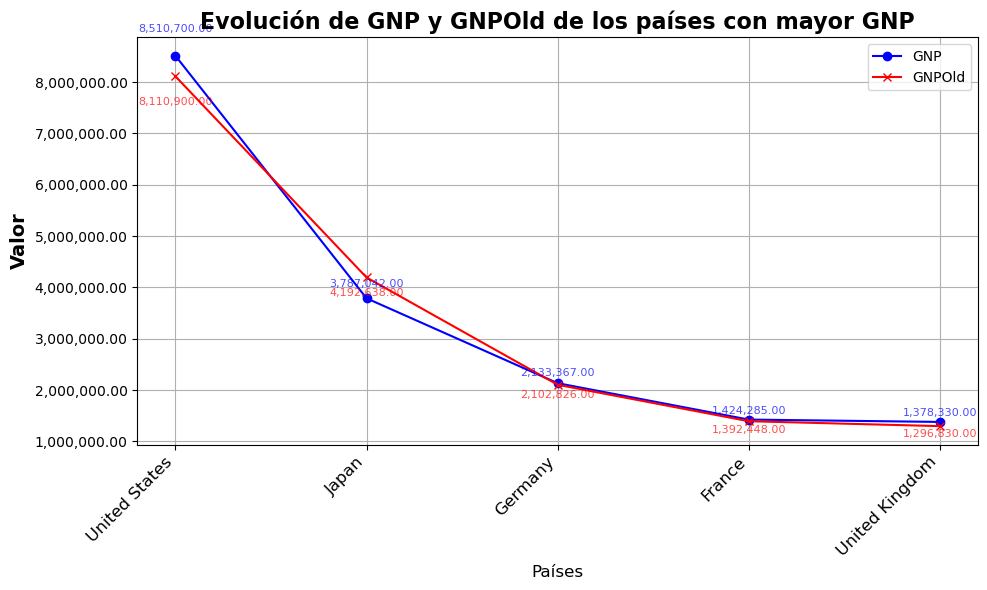

In [208]:
# Función para formatear los valores del eje Y con más precisión
def precision_format(x, pos):
    return f'{x:,.2f}'  # Cambia 2 a la cantidad de decimales que prefieras

# Ordenar los países por GNP de mayor a menor y seleccionar los primeros 5
top_5_countries = selected_countries.sort_values(by='GNP', ascending=False).head(5)

# Crear gráfico de líneas para GNP y GNPOld de los países seleccionados
plt.figure(figsize=(10, 6))

# Graficar GNP
line_gnp, = plt.plot(top_5_countries['Name'], top_5_countries['GNP'], label='GNP', color='blue', marker='o')

# Graficar GNPOld
line_gnp_old, = plt.plot(top_5_countries['Name'], top_5_countries['GNPOld'], label='GNPOld', color='red', marker='x')

# Añadir etiquetas y título
plt.title('Evolución de GNP y GNPOld de los países con mayor GNP', fontsize=16, fontweight='bold')
plt.xlabel('Países', fontsize=12)
plt.ylabel('Valor', fontsize=14, fontweight='bold')

# Rotar los nombres de los países para que se vean mejor
plt.xticks(rotation=45, ha='right', fontsize=12)

# Aplicar el formato personalizado a los valores del eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(precision_format))

# Añadir leyenda
plt.legend()

# Agregar los valores a lo largo de la línea, con tamaño de fuente más pequeño
for i, (x, y) in enumerate(zip(top_5_countries['Name'], top_5_countries['GNP'])):
    # Ajustar la posición de las etiquetas para que no se sobrepongan
    offset = 0.05 * y  # Puedes cambiar este valor para ajustar la distancia de las etiquetas
    plt.text(x, y + offset, f'{y:,.2f}', color='blue', fontsize=8, ha='center', va='bottom', alpha=0.7)

for i, (x, y) in enumerate(zip(top_5_countries['Name'], top_5_countries['GNPOld'])):
    # Ajustar la posición de las etiquetas para que no se sobrepongan
    offset = -0.05 * y  # Puedes cambiar este valor para ajustar la distancia de las etiquetas
    plt.text(x, y + offset, f'{y:,.2f}', color='red', fontsize=8, ha='center', va='top', alpha=0.7)

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()  # Ajustar el espaciado para evitar que las etiquetas se corten
plt.show()

In [44]:
# Filtrar filas con valores nulos en la columna HeadOfState 
print("\n🔍 Filas con valores nulos en la columna 'HeadOfState' en Country:")
df_nulos_headofstate = df_country[df_country["HeadOfState"].isnull()]
df_nulos_headofstate


🔍 Filas con valores nulos en la columna 'HeadOfState' en Country:


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
5,AND,Andorra,Europe,Southern Europe,468.00,"1,278.00",78000,83.50,"1,630.00",NaN,Andorra,Parliamentary Coprincipality,NaN,55.00,AD
11,ATA,Antarctica,Antarctica,Antarctica,"13,120,000.00",NaN,0,NaN,0.00,NaN,–,Co-administrated,NaN,NaN,AQ
193,SMR,San Marino,Europe,Southern Europe,61.00,885.00,27000,81.10,510.00,NaN,San Marino,Republic,NaN,"3,171.00",SM


##### 🛠️ Actualización de Jefes de Estado para 2002

Se evidencia que tres países tenían datos nulos para jefes de estado, pero tras realizar una búsqueda externae, se encontró que **Andorra** y **San Marino** sí tienen jefes de estado en 2002:

- **Andorra**: Tiene dos copríncipes: **Joan-Enric Vives i Sicília** (Obispo de Urgell) y **Jacques Chirac** (Presidente de Francia).
- **San Marino**: Tiene dos Capitanes Regentes, que cambian cada seis meses.

**Antártida**, sin embargo, no tiene jefe de estado debido a su estatus internacional bajo el Tratado Antártico.

In [46]:
# Filtrar filas con valores nulos en la columna Capital 
print("\n🔍 Filas con valores nulos en la columna 'Capital ' en Country:")
df_nulos_capital = df_country[df_country["Capital"].isnull()]
df_nulos_capital


🔍 Filas con valores nulos en la columna 'Capital ' en Country:


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
11,ATA,Antarctica,Antarctica,Antarctica,"13,120,000.00",NaN,0,NaN,0.00,NaN,–,Co-administrated,NaN,NaN,AQ
12,ATF,French Southern territories,Antarctica,Antarctica,"7,780.00",NaN,0,NaN,0.00,NaN,Terres australes françaises,Nonmetropolitan Territory of France,Jacques Chirac,NaN,TF
34,BVT,Bouvet Island,Antarctica,Antarctica,59.00,NaN,0,NaN,0.00,NaN,Bouvetøya,Dependent Territory of Norway,Harald V,NaN,BV
93,HMD,Heard Island and McDonald Islands,Antarctica,Antarctica,359.00,NaN,0,NaN,0.00,NaN,Heard and McDonald Islands,Territory of Australia,Elisabeth II,NaN,HM
100,IOT,British Indian Ocean Territory,Africa,Eastern Africa,78.00,NaN,0,NaN,0.00,NaN,British Indian Ocean Territory,Dependent Territory of the UK,Elisabeth II,NaN,IO
187,SGS,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,"3,903.00",NaN,0,NaN,0.00,NaN,South Georgia and the South Sandwich Islands,Dependent Territory of the UK,Elisabeth II,NaN,GS
221,UMI,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,16.00,NaN,0,NaN,0.00,NaN,United States Minor Outlying Islands,Dependent Territory of the US,George W. Bush,NaN,UM


In [47]:
# Filtrar filas con valores nulos en la columna Code2
print("\n🔍 Filas con valores nulos en la columna 'Code2' en Country:")
df_nulos_code2 = df_country[df_country["Code2"].isnull()]
df_nulos_code2


🔍 Filas con valores nulos en la columna 'Code2' en Country:


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
151,NAM,Namibia,Africa,Southern Africa,"824,292.00","1,990.00",1726000,42.50,"3,101.00","3,384.00",Namibia,Republic,Sam Nujoma,"2,726.00",NaN


Según el código ISO 3166-1 Alpha-2 de Namibia es "NA", por lo tanto se completa el campo Code2 con "NA" para mantener la coherencia del dataset

Después de hacer una exploración del df Country, apliqué cambios en los tipos de datos para para mantener la coherencia y facilitar análisis, n las columnas: 

 - `IndepYear` y `Capital`: cambio tipo de dato de float64 a Int64

#### 🔍 Exploración de Countrylanguage

In [51]:
df_countrylanguage

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.30
1,ABW,English,F,9.50
2,ABW,Papiamento,F,76.70
3,ABW,Spanish,F,7.40
4,AFG,Balochi,F,0.90
...,...,...,...,...
979,ZMB,Tonga,F,11.00
980,ZWE,English,T,2.20
981,ZWE,Ndebele,F,16.20
982,ZWE,Nyanja,F,2.20


In [52]:
print("📊 Información General de Countrylanguage\n")
df_countrylanguage.info()

📊 Información General de Cpuntry

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  984 non-null    object 
 1   Language     984 non-null    object 
 2   IsOfficial   984 non-null    object 
 3   Percentage   984 non-null    float64
dtypes: float64(1), object(3)
memory usage: 30.9+ KB


En este caso, se observa que la cantidad de registros en Country (239) y CountryLanguage (984) no coincide, lo cual es esperable, ya que un mismo país puede tener varios idiomas oficiales o hablados.

Estos cambios fueron implementados en el **archivo de transformación dentro del ETL en VS Code**, asegurando que la corrección de los valores nulos forme parte del **proceso automatizado**. Finalmente, los datos transformados fueron guardados en el archivo CSV actualizado, garantizando que el dataset se mantenga limpio y listo para su análisis.

### Validación de la transformación dentro del ETL en VS Code 

In [47]:
# Guardar las columnas tipo "object" antes de convertir
columnas_object = df_country.select_dtypes(include=["object"]).columns

In [49]:
# Convertir solo columnas numéricas sin afectar las tipo "object"
df_country[df_country.columns.difference(columnas_object)] = df_country[df_country.columns.difference(columnas_object)].convert_dtypes()

In [156]:
# Dado que se presentó inconvenientes en el cambio de tipo de dato en Jupyter, se utiliza el siguiente código para aplicar estos
# en el notebook 

# Aplicar conversión solo a las columnas específicas
df_country['IndepYear'] = df_country['IndepYear'].astype('Int64')
df_country['Capital'] = df_country['Capital'].astype('Int64')

In [158]:
# Verificar cambios
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             239 non-null    object 
 1   Name             239 non-null    object 
 2   Continent        239 non-null    object 
 3   Region           239 non-null    object 
 4   SurfaceArea      239 non-null    float64
 5   IndepYear        192 non-null    Int64  
 6   EsIndependizado  239 non-null    object 
 7   Population       239 non-null    int64  
 8   LifeExpectancy   222 non-null    float64
 9   GNP              239 non-null    float64
 10  GNPOld           239 non-null    float64
 11  LocalName        239 non-null    object 
 12  GovernmentForm   239 non-null    object 
 13  HeadOfState      239 non-null    object 
 14  Capital          232 non-null    Int64  
 15  Code2            238 non-null    object 
dtypes: Int64(2), float64(4), int64(1), object(9)
memory usage: 30.

In [166]:
detectar_nulos(df_country, "Country")


🔍 Valores nulos en Country:


,Valores Nulos,Porcentaje (%)
IndepYear,47,20
LifeExpectancy,17,7
Capital,7,3
Code2,1,0


In [176]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             239 non-null    object 
 1   Name             239 non-null    object 
 2   Continent        239 non-null    object 
 3   Region           239 non-null    object 
 4   SurfaceArea      239 non-null    float64
 5   IndepYear        192 non-null    Int64  
 6   EsIndependizado  239 non-null    object 
 7   Population       239 non-null    int64  
 8   LifeExpectancy   222 non-null    float64
 9   GNP              239 non-null    float64
 10  GNPOld           239 non-null    float64
 11  LocalName        239 non-null    object 
 12  GovernmentForm   239 non-null    object 
 13  HeadOfState      239 non-null    object 
 14  Capital          232 non-null    Int64  
 15  Code2            238 non-null    object 
dtypes: Int64(2), float64(4), int64(1), object(9)
memory usage: 30.

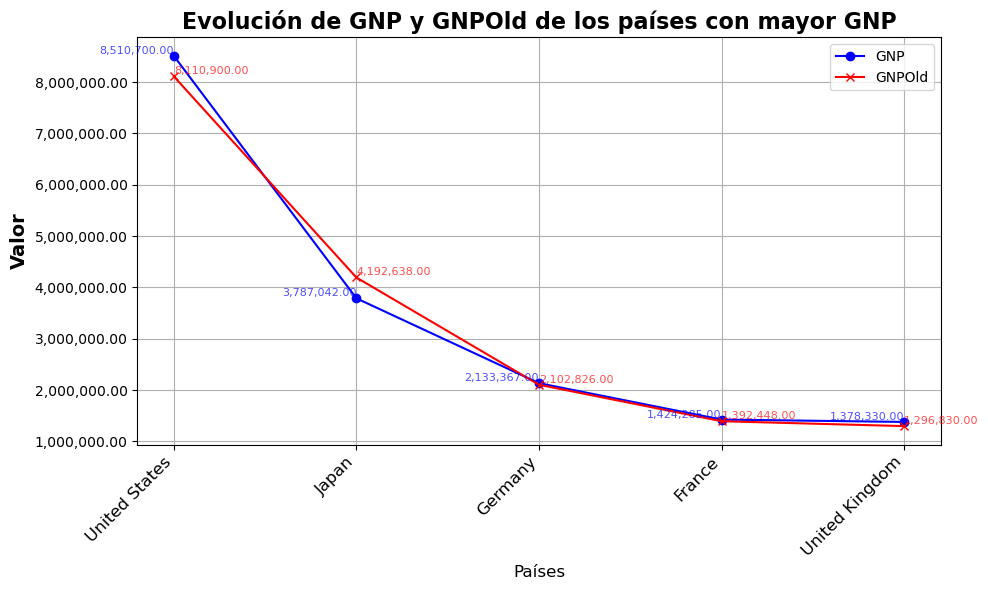

### 🚀 Solución Sección 2

Resolver las siguientes consultas utilizando código SQL desde Python:

In [1]:
! pip install sqlalchemy mysql-connector-python

In [1]:
!pip install pymysql

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 1.1 MB/s eta 0:00:00


In [90]:
import pandas as pd
from sqlalchemy import create_engine, text
from config import MYSQL_CONFIG  # Importa la configuración desde config.py


# Usar 'pymysql' en lugar de 'mysql-connector'
engine = create_engine(f"mysql+pymysql://{MYSQL_CONFIG['user']}:{MYSQL_CONFIG['password']}@{MYSQL_CONFIG['host']}:{MYSQL_CONFIG['port']}/{MYSQL_CONFIG['database']}")

# Función para ejecutar consultas SELECT
def ejecutar_query(query, title="Resultados"):

    pd.set_option('display.float_format', '{:,.0f}'.format) # esta función le pide apandas que muestre los números flotantes sin notación científica y con separadores de miles.
    
    try:
        with engine.connect() as connection:
            df = pd.read_sql(query, connection)  
        if not df.empty:
            print(f"\n📊 {title}:\n(df, headers='keys', tablefmt='fancy_grid')")
        else:
            print(f"\n🔍 {title}: No se encontraron datos.")
        return df
    except Exception as err:
        print(f'❌ Error en la consulta: {err}')
        return None

# Función para ejecutar consultas UPDATE, INSERT o DELETE

def ejecutar_update(query, description=""):
    try:

        # Usar text() para envolver la consulta SQL
        query = text(query)
        
        with engine.connect() as connection:
            connection.execute(query) # Ejecutar la consulta SQL
            print(f"✅ {description} realizada con éxito.")
    
    except Exception as err:
        print(f'❌ Error al actualizar: {err}')
        print(f'Consulta SQL que falló: {query}')  # Muestra la consulta que falló para diagnóstico


- **Ejercicio 1**: Escribe una consulta para mostrar el nombre y la población de todos los países del continente europeo.

In [50]:
# 1️⃣ Países de Europa y su población
query1 = """
SELECT Name, Population 
FROM country 
WHERE Continent = 'Europe';"""

ejecutar_query(query1, "Países de Europa y su Población")


📊 Países de Europa y su Población:
(df, headers='keys', tablefmt='fancy_grid')


,Name,Population
0,Albania,3401200
1,Andorra,78000
2,Austria,8091800
3,Belgium,10239000
4,Bulgaria,8190900
5,Bosnia and Herzegovina,3972000
6,Belarus,10236000
7,Switzerland,7160400
8,Czech Republic,10278100
9,Germany,82164700


- **Ejercicio 2**: Escribe una consulta para mostrar los nombres y las áreas de superficie de los cinco países más grandes del mundo (en términos de área de superficie)

In [102]:
# 2️⃣ Los 5 países más grandes por superficie
query2 = """
SELECT Name, SurfaceArea FROM country ORDER BY SurfaceArea DESC LIMIT 5;"""
ejecutar_query(query2, "Top 5 Países con Mayor Superficie")


📊 Top 5 Países con Mayor Superficie:
(df, headers='keys', tablefmt='fancy_grid')


,Name,SurfaceArea
0,Russian Federation,"17,075,400"
1,Antarctica,"13,120,000"
2,Canada,"9,970,610"
3,China,"9,572,900"
4,United States,"9,363,520"


In [144]:
# Diccionario con las coordenadas de los países
coordenadas_paises = {
    'Russian Federation': [55.7558, 37.6173],  # Moscú, Rusia
    'Antarctica': [-82.8628, 135.0],  # Centro aproximado de la Antártida
    'Canada': [56.1304, -106.3468],  # Centro de Canadá
    'China': [35.8617, 104.1954],  # Centro de China
    'United States': [37.0902, -95.7129],  # Centro de los Estados Unidos
}

# Crear el mapa (centrado en el mundo, puedes ajustarlo más específicamente a la región)
mapa = folium.Map(location=[20, 0], zoom_start=2)

# Ejemplo de DataFrame con los países y sus superficies (como en tu consulta)
import pandas as pd

# Simulamos los datos
data = {
    'Name': ['Russian Federation', 'Antarctica', 'Canada', 'China', 'United States'],
    'SurfaceArea': [17075400, 13120000, 9970610, 9572900, 9363520]
}

result_df = pd.DataFrame(data)

# Añadir las burbujas con las coordenadas y la superficie
for _, row in result_df.iterrows():
    country = row['Name']
    surface_area = row['SurfaceArea']
    
    if country in coordenadas_paises:
        lat, lon = coordenadas_paises[country]
        folium.CircleMarker(
            location=[lat, lon],
            radius=surface_area / 1000000,  # Ajusta el tamaño de la burbuja según la superficie
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=0.6,
            popup=f"{country}: {surface_area} km²"
        ).add_to(mapa)

# Guardar el mapa a un archivo HTML
mapa.save("mapa_burbujas.html")

In [136]:
! pip install folium

- **Ejercicio 3**: Escribe una consulta para calcular la población total de todos los países de cada continente y mostrar el resultado junto con el nombre del continente.

In [74]:
# 3️⃣ Población total por continente
query3 = """
SELECT Continent, SUM(Population) AS TotalPopulation 
FROM country 
GROUP BY Continent
ORDER BY TotalPopulation DESC;"""
ejecutar_query(query3, "Población Total por Continente")


📊 Población Total por Continente:
(df, headers='keys', tablefmt='fancy_grid')


,Continent,TotalPopulation
0,Asia,"3,927,467,700"
1,Africa,"784,475,000"
2,Europe,"730,074,600"
3,North America,"482,993,000"
4,South America,"345,780,000"
5,Oceania,"30,401,150"
6,Antarctica,0


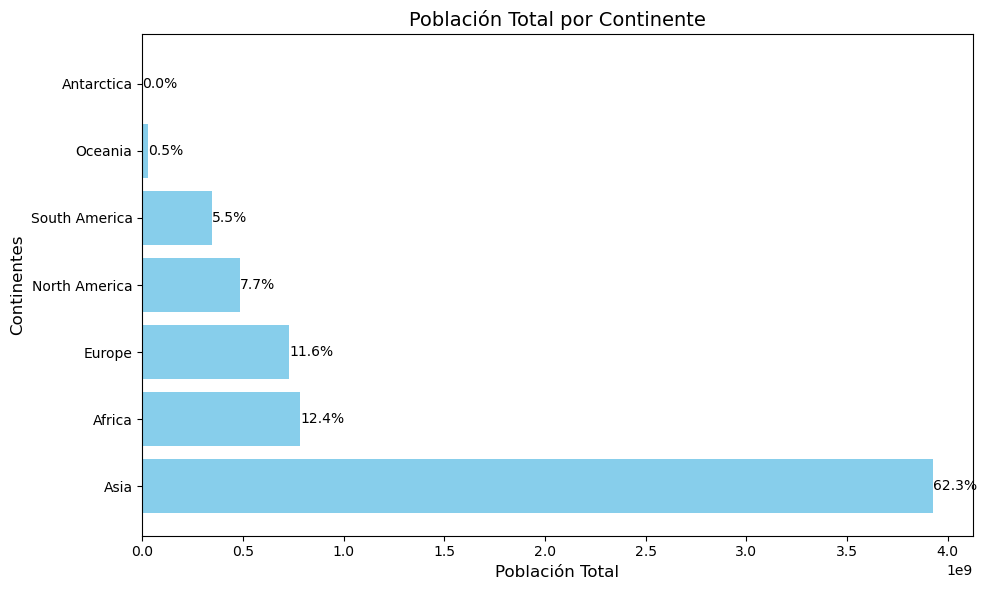

In [134]:
# Comprobar si los resultados fueron obtenidos correctamente
if result_df is not None:
    # Calcular el total de población global
    total_population = result_df['TotalPopulation'].sum()
    
    # Calcular el porcentaje de población por continente
    result_df['Percentage'] = (result_df['TotalPopulation'] / total_population) * 100
    
    # Crear la gráfica de barras horizontales
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    bars = plt.barh(result_df['Continent'], result_df['TotalPopulation'], color='skyblue')  # Gráfica de barras horizontales
    
    # Añadir título y etiquetas
    plt.title('Población Total por Continente', fontsize=14)
    plt.xlabel('Población Total', fontsize=12)
    plt.ylabel('Continentes', fontsize=12)
    
    # Añadir los porcentajes sobre las barras
    for bar in bars:
        width = bar.get_width()  # Obtener la longitud de la barra (población)
        percentage = (width / total_population) * 100  # Calcular el porcentaje
        plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', va='center', ha='left', fontsize=10)

    # Mostrar la gráfica
    plt.tight_layout()  # Asegura que todo se vea bien ajustado
    plt.show()

- **Ejercicio 4**: Escribe una consulta para mostrar el nombre de las ciudades y la población de todos los países de Europa, ordenados por población de la ciudad de manera descendente.

In [76]:
# 4️⃣ Ciudades de Europa ordenadas por población
query4 = """
SELECT ci.Name AS City, ci.Population, co.Name AS Country
FROM city ci
JOIN country co ON ci.CountryCode = co.Code
WHERE co.Continent = 'Europe'
ORDER BY ci.Population DESC;
"""
ejecutar_query(query4, "Ciudades de Europa Ordenadas por Población")


📊 Ciudades de Europa Ordenadas por Población:
(df, headers='keys', tablefmt='fancy_grid')


,City,Population,Country
0,Moscow,8389200,Russian Federation
1,London,7285000,United Kingdom
2,St Petersburg,4694000,Russian Federation
3,Berlin,3386667,Germany
4,Madrid,2879052,Spain
...,...,...,...
836,Serravalle,4802,San Marino
837,San Marino,2294,San Marino
838,Longyearbyen,1438,Svalbard and Jan Mayen
839,Monaco-Ville,1234,Monaco


- **Ejercicio 5**: Actualiza la población de China (código de país 'CHN') a 1500000000 (1.5 mil millones).

In [92]:
# 5️⃣ Actualizar la población de China
query5 = """UPDATE country 
SET Population = 1500000000 
WHERE Code = 'CHN';"""
ejecutar_update(query5, "Actualización de la Población de China")

# 🔎 Verificar actualización de China
query_check = "SELECT Code, Population FROM country WHERE Code = 'CHN';"
ejecutar_query(query_check, "Verificación de Población de China")

✅ Actualización de la Población de China realizada con éxito.

📊 Verificación de Población de China:
(df, headers='keys', tablefmt='fancy_grid')


,Code,Population
0,CHN,1500000000
